In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report



In [2]:
df = pd.read_excel("/content/heart_disease.xlsx")
df.head()


,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [4]:
df.describe()


,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


In [5]:
df.isna().sum()


,0
age,0
Age in years,0


In [6]:
df.select_dtypes(include="number").head()


""
0
1
2
3
4


In [7]:
df = pd.read_excel("heart_disease.xlsx")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df.head()


,age,age_in_years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [8]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes


,0
age,float64
age_in_years,float64


In [9]:
df = df.fillna(df.median())
df.isna().sum()


,0
age,12
age_in_years,12


In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           0 non-null      float64
 1   age_in_years  0 non-null      float64
dtypes: float64(2)
memory usage: 324.0 bytes


,age,age_in_years
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


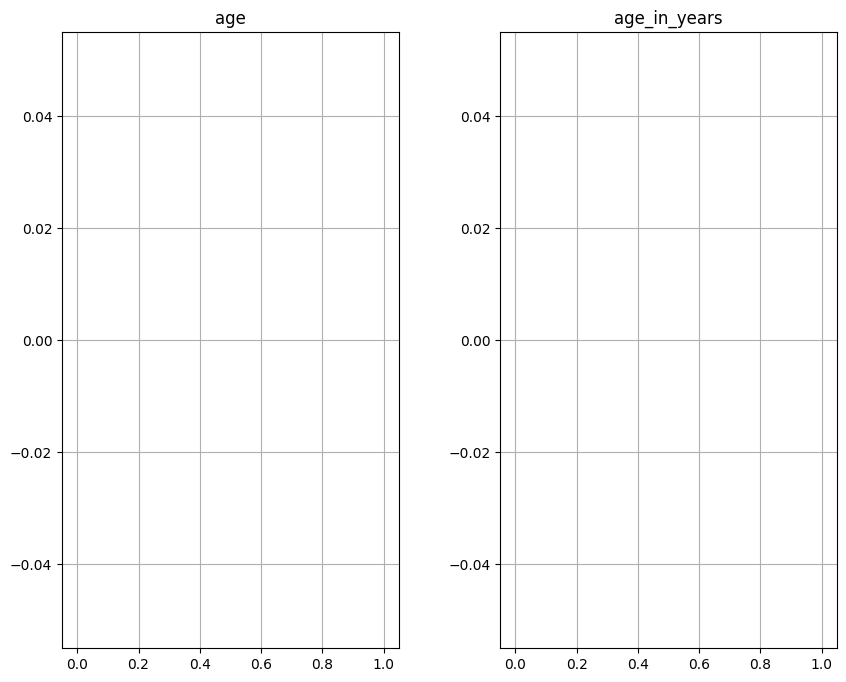

In [12]:
df.hist(figsize=(10,8))
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


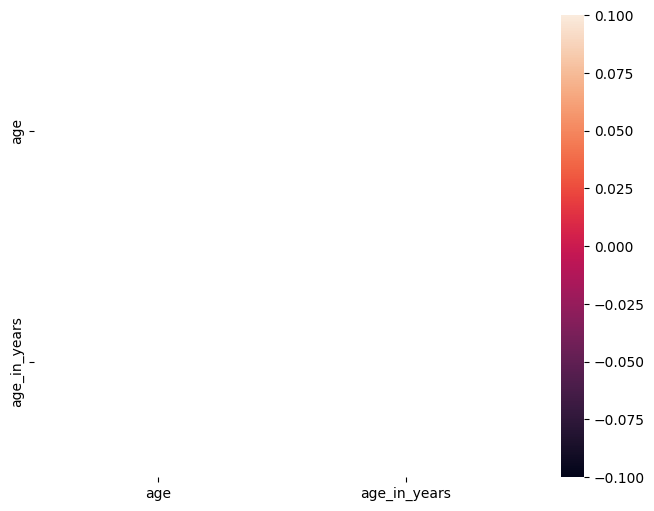

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()
